In [2]:
import torch
import torch.nn as nn

import gymnasium as gym


## REINFORCE algorithm
while not converged:

    1. sample N trajectories using current policy and observe returns

    2. estimate policy gradient as average over trajectories
    
    3. update policy using gradient ascent


In [21]:
class Agent:

    def __init__(self, policy): 
        self.records = {
            'state':[],
            'action':[],
            'next_state':[],
            'reward': [],
            'done':[]
        }
        self.policy = policy

    def append_record(self, state, action, next_state, reward, done):
        self.records['state'].append(state)
        self.records['action'].append(action)
        self.records['next_state'].append(next_state)
        self.records['reward'].append(reward)
        self.records['done'].append(done)


    def sample_trajectory(self, env: gym.Env, n_samples:int):

        for episode in range(n_samples):
            state, info = env.reset()
            done = False
            while not done:
                ## TODO: make a policy choice
                action = policy.act(state) #env.action_space.sample()
                next_state, reward, terminated, truncated, info = env.step(action)
                done = terminated or truncated

                self.append_record(
                    state, 
                    action, 
                    next_state, 
                    reward, 
                    done
                )

                state = next_state

In [6]:
def sample_trajectory(env: gym.Env, n_samples: int):
    records = {
        'state':[],
        'action':[],
        'next_state':[],
        'reward': [],
        'done':[]
    }
    for episode in range(n_samples):
        state, info = env.reset()
        done = False
        while not done:
            ## TODO: make a policy choice
            action = env.action_space.sample()
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            ## TODO: make nice
            records['state'].append(state)
            records['action'].append(action)
            records['next_state'].append(next_state)
            records['reward'].append(reward)
            records['done'].append(done)

            state = next_state
    
    return records

env = gym.make('CartPole-v1')
samples = sample_trajectory(env, 10)

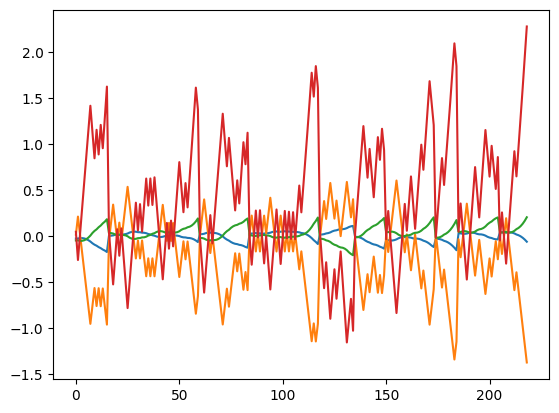

In [20]:
import numpy as np
import matplotlib.pyplot as plt
states = np.array(samples['state'])
plt.plot(range(states.shape[0]), states)
plt.show();